<a href="https://colab.research.google.com/github/DBCooper200/project_dl/blob/main/1_simple_conv_nn_with_2_and_3_hidden_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

built in splitting of data 

In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

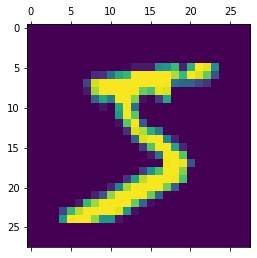

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

we will initially create a simple 2 layer n/w

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
'''
dense because each input neuron is cncted to every other op neuron
10 is the size or shape of op
activation refers to activation function
optimizers allow efficient training
  when bkwrd propogation, training occurs optimizer allows model to reach global optima i.e. the point with lowest mean square error
  in efficient way
categorical because op has to be categorized into 10 classes
sparse because y or op variable is an integer value
One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning 
algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data 
in machine learning.
if it is one hot encoded array we use categorical cross entropy
The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
Computes the crossentropy loss between the labels and predictions.

Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.
accuracy is what we expect in the model
'''
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 10.3345 - accuracy: 0.8354
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1521 - accuracy: 0.8774
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6869 - accuracy: 0.8831
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4377 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4401 - accuracy: 0.8872


accuracy is too low thus we scale the x_train values i.e shorten the range scaling improves accuracy

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4662 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9256


better accuracy

In [ ]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
model.evaluate(X_test_flattened,y_test)             #accuracy check

313/313 [==============================] - 1s 1ms/step - loss: 0.2641 - accuracy: 0.9276


[0.26407381892204285, 0.9276000261306763]

In [ ]:
model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


array([[3.4668952e-02, 4.6991522e-07, 8.1909709e-02, ..., 9.9983877e-01,
        9.7696736e-02, 7.1847260e-01],
       [4.3028659e-01, 4.9798335e-03, 9.9980539e-01, ..., 1.5041580e-12,
        1.3735883e-01, 2.6554374e-09],
       [3.1216673e-04, 9.9326944e-01, 6.7050827e-01, ..., 1.6051769e-01,
        3.4271234e-01, 3.5072520e-02],
       ...,
       [4.6622372e-06, 4.7099566e-06, 1.4896379e-03, ..., 2.8700361e-01,
        4.6593949e-01, 7.8886163e-01],
       [1.6093942e-04, 2.0470023e-04, 2.5596298e-04, ..., 5.6542460e-05,
        6.2988341e-01, 1.0389373e-04],
       [7.4082296e-03, 4.8124199e-10, 2.6020858e-01, ..., 1.8463144e-08,
        2.9064092e-04, 1.2451109e-06]], dtype=float32)

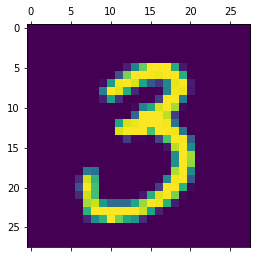

In [ ]:
plt.matshow(X_test[90])

In [ ]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_predicted[90]
#the 10 values are the scores of all the 10 neurons the maximum value will indicate the actual answer

array([7.5515449e-02, 1.9230630e-03, 3.2579929e-02, 9.9887270e-01,
       1.5360281e-04, 7.5258374e-01, 2.1045838e-07, 6.5667555e-02,
       3.6949420e-01, 9.1059424e-02], dtype=float32)

In [ ]:
np.argmax(y_predicted[90])

3

In [ ]:
tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

InvalidArgumentError: ignored

In [ ]:
#error is because y_predicted is an array this is converted by doing the below
y_predicted_tables=[np.argmax(i) for i in y_predicted]
y_predicted_tables[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_tables)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    8,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    7,  942,   11,    7,    3,   11,    9,   32,    5],
       [   4,    0,   25,  909,    0,   27,    2,   13,   21,    9],
       [   1,    1,    8,    0,  906,    0,   10,    5,    9,   42],
       [  11,    3,    6,   26,    9,  777,   14,    8,   31,    7],
       [   9,    3,    9,    1,    7,   10,  914,    2,    3,    0],
       [   1,    6,   24,    2,    5,    0,    0,  958,    2,   30],
       [   6,   10,    9,   20,    9,   24,    9,   13,  868,    6],
       [  10,    7,    2,   10,   18,    6,    0,   28,    5,  923]],
      dtype=int32)>

import seaborn as sn
plt.figure()
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
#we see from above that there are a lot of errors we will resolve this by adding a hidden layer
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),#100 represents no of neurons in op layer it can be any number lesser than ip shape
      keras.layers.Dense(10,activation='sigmoid')#input shape is figured out from last layer
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train, epochs=5)
#hidden layer increasescomputation

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2820 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1286 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0537 - accuracy: 0.9838


In [ ]:
model.evaluate(X_test_flattened,y_test)             #accuracy check

313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9742


[0.08852890878915787, 0.9742000102996826]

In [ ]:
model.evaluate(X_test_flattened,y_test)             #accuracy check

313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9742


[0.08852890878915787, 0.9742000102996826]

Text(33.0, 0.5, 'truth')

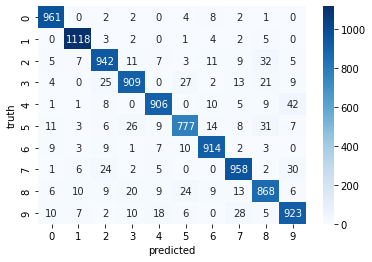

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_tables)
plt.figure()
sn.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
#we see from above that there are a lot of errors we will resolve this by adding a hidden layer
model=keras.Sequential([
      keras.layers.Dense(100,input_shape=(784,),activation='relu'),#100 represents no of neurons in op layer it can be any number lesser than ip shape
      keras.layers.Dense(10,activation='sigmoid')#input shape is figured out from last layer
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train, epochs=10)
#hidden layer increasescomputation

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020